**Tugas AI Pra UTS**

**Implementasi Multiple Linear Regression**

**Evira Meidwitami
19/443572/TK/48768**

**Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Upload File Dataset**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving BIKE DETAILS.csv to BIKE DETAILS.csv


**Membaca dan Menampilkan Data**

In [4]:
data=pd.read_csv('BIKE DETAILS.csv',index_col=0)
data.dropna()

,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
name,,,,,,
Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0
...,...,...,...,...,...,...
Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


**Pengaruh Ex Showroom Price Terhadap Selling Price**

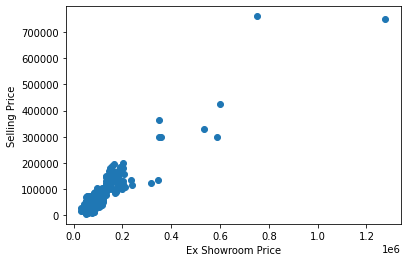

In [8]:
plt.scatter(data['ex_showroom_price'], data['selling_price'])
plt.xlabel('Ex Showroom Price')
plt.ylabel('Selling Price')
plt.show()

**Pengaruh Year Terhadap Selling Price**

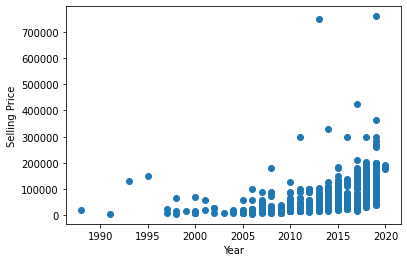

In [22]:
plt.scatter(data['year'], data['selling_price'])
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

**Pengaruh Km Driven Terhadap Selling Price**

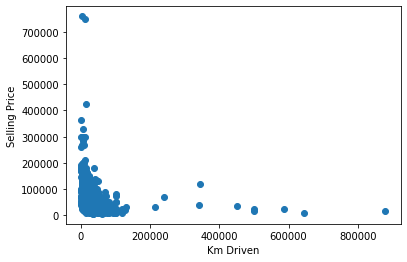

In [9]:
plt.scatter(data['km_driven'], data['selling_price'])
plt.xlabel('Km Driven')
plt.ylabel('Selling Price')
plt.show()

**Implementasi Multiple Linear Regression**

Deklarasi variabel Matrix

In [10]:
data_np=data.to_numpy()
data_np.shape

(1061, 6)

Mendefinisikan Model Matrix

In [16]:
def get_prediction(model, X):
  (n, p_minus_one)=X.shape
  p=p_minus_one+1

  new_X =np.ones(shape=(n, p))
  new_X[:, 1:] =X

  return np.dot(new_X, model)
  

Memprediksi Nilai dengan Model

In [31]:
test_model = np.array([1, 2, 1])
get_prediction(test_model, X_train)

array([352020.,  92018., 302019., ...,  32014.,  26010.,  22009.])

**Hasil Linear Regression**

In [30]:
predictions_data=pd.DataFrame({'selling_price':data['selling_price'],'km driven':data['km_driven'],'ex showroom price':data['ex_showroom_price'], 'SP Predictions':get_prediction(test_model, X_train)})
predictions_data.dropna()

,selling_price,km driven,ex showroom price,SP Predictions
name,,,,
Royal Enfield Classic Gunmetal Grey,150000,12000,148114.0,302019.0
Yamaha Fazer FI V 2.0 [2016-2018],65000,23000,89643.0,132016.0
Honda CB Twister,18000,60000,53857.0,38011.0
Honda CB Hornet 160R,78500,17000,87719.0,159019.0
Bajaj Discover 125,50000,42000,60122.0,102017.0
...,...,...,...,...
Activa 3g,17000,500000,52000.0,36011.0
Honda CB twister,16000,33000,51000.0,34013.0
Bajaj Discover 125,15000,35000,57000.0,32014.0


**Menghitung Nilai MSE**

In [32]:
# Given values
Y_true = [17000,16000,15000,12000,10000]  # Y_true = Y (original values)
  
# Calculated values
Y_pred = [36011,34013,32014,26010,22009]  # Y_pred = Y'
  
# Mean Squared Error
MSE = np.square(np.subtract(Y_true,Y_pred)).mean()
MSE

263171733.4